Project 3
Rose Hedderman
EID: rrh2298

In [1]:
# IMPORTANT
# Running this chunk lets you have multiple outputs from a single chunk; run it first!
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import packages
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# view all datasets in seaborn package to see which sounds interesting to investigate
sns.get_dataset_names()

C:\Users\roseh\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\roseh\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [4]:
# Read dataset and take a peek
brain = sns.load_dataset('brain_networks', header= [0,1,2], index_col =0)
brain2 = brain.T
brain2.head()
brain.info()

0          1          2          3          4    \
network node hemi                                                          
1       1    lh    56.055744  55.547253  60.997768  18.514868  -2.527392   
             rh    92.031036  43.690075  63.438793  12.657158 -63.104668   
2       1    lh     3.391576 -65.495987 -51.108582 -34.576603 -13.814151   
             rh    38.659683 -13.974523 -13.561346 -32.665958 -15.837989   
3       1    lh    26.203819 -28.274963 -18.842947  -7.420454 -45.216927   

                         5          6          7          8          9    ...  \
network node hemi                                                         ...   
1       1    lh   -24.906792  17.273710  20.712934  48.215309   2.632546  ...   
             rh   -51.191895   0.540083  10.650232  46.369450  33.998898  ...   
2       1    lh   -29.867994  18.649370   9.156902  30.311281   8.142659  ...   
             rh   -27.840294  -9.105489 -15.880466  21.030554  42.572460  ...   
3       1    lh   -24.455107  -2.117226   1.948806 -14.135849   0.644133  ...   

                         910        911        912        913        914  \
network node hemi                                                          
1       1    lh    24.222689  14.745139  -1.394518  29.187019  33.907829   
             rh    13.787035  29.623751  12.264177  32.221706  22.808693   
2       1    lh    15.862537  22.230673   3.646372  -3.308156 -11.310944   
             rh    26.212393  -8.099920   8.279686   7.092106 -20.270006   
3       1    lh    -3.665057  -9.300721 -30.659218 -25.375641 -32.992405   

                         915        916        917         918        919  
network node hemi                                                          
1       1    lh    -7.429513 -33.554138 -78.539566 -103.235825 -36.288868  
             rh    -4.813219 -38.605621 -74.197189  -98.744286 -10.762070  
2       1    lh    -3.670537 -25.664803 -54.041595  -40.109543 -30.356262  
             rh     1.442261 -30.252352 -39.970291  -44.907734 -23.319504  
3       1    lh   -19.680431   5.562785 -14.277059   12.109148  14.252188  

[5 rows x 920 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 919
Data columns (total 62 columns):
(1, 1, lh)     920 non-null float64
(1, 1, rh)     920 non-null float64
(2, 1, lh)     920 non-null float64
(2, 1, rh)     920 non-null float64
(3, 1, lh)     920 non-null float64
(3, 1, rh)     920 non-null float64
(4, 1, lh)     920 non-null float64
(4, 1, rh)     920 non-null float64
(5, 1, lh)     920 non-null float64
(5, 1, rh)     920 non-null float64
(6, 1, lh)     920 non-null float64
(6, 1, rh)     920 non-null float64
(6, 2, lh)     920 non-null float64
(6, 2, rh)     920 non-null float64
(7, 1, lh)     920 non-null float64
(7, 1, rh)     920 non-null float64
(7, 2, lh)     920 non-null float64
(7, 2, rh)     920 non-null float64
(7, 3, lh)     920 non-null float64
(7, 3, rh)     920 non-null float64
(8, 1, lh)     920 non-null float64
(8, 1, rh)     920 non-null float64
(8, 2, lh)     920 non-null float64
(8, 2, rh)     920 non-null float64
(8, 3, lh)     920 non-null flo

I chose the brain_networks dataset because I am interested in investigating brain data in general. There are 920 columns and 62 rows in the dataset with the main variables being the network, node and which hemisphere the data was taken in. There are 17 networks each with four measurements taken at each node on each hemisphere of the brain for a total of 920 measurements of neural spiking data.

In [5]:
neuro = brain2
neuro = neuro.reset_index(level = ["network", "node"])
neuro = neuro.reset_index()
neuro.head()
neuro.info()

,hemi,network,node,0,1,2,3,4,5,6,...,910,911,912,913,914,915,916,917,918,919
0,lh,1,1,56.055744,55.547253,60.997768,18.514868,-2.527392,-24.906792,17.273710,...,24.222689,14.745139,-1.394518,29.187019,33.907829,-7.429513,-33.554138,-78.539566,-103.235825,-36.288868
1,rh,1,1,92.031036,43.690075,63.438793,12.657158,-63.104668,-51.191895,0.540083,...,13.787035,29.623751,12.264177,32.221706,22.808693,-4.813219,-38.605621,-74.197189,-98.744286,-10.762070
2,lh,2,1,3.391576,-65.495987,-51.108582,-34.576603,-13.814151,-29.867994,18.649370,...,15.862537,22.230673,3.646372,-3.308156,-11.310944,-3.670537,-25.664803,-54.041595,-40.109543,-30.356262
3,rh,2,1,38.659683,-13.974523,-13.561346,-32.665958,-15.837989,-27.840294,-9.105489,...,26.212393,-8.099920,8.279686,7.092106,-20.270006,1.442261,-30.252352,-39.970291,-44.907734,-23.319504
4,lh,3,1,26.203819,-28.274963,-18.842947,-7.420454,-45.216927,-24.455107,-2.117226,...,-3.665057,-9.300721,-30.659218,-25.375641,-32.992405,-19.680431,5.562785,-14.277059,12.109148,14.252188


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 923 entries, hemi to 919
dtypes: float64(920), object(3)
memory usage: 447.2+ KB


I changed the layout of the dataframe to explicitly show the hemi, netowkr, and node for each index.

In [6]:
# exploratory data analysis

# number of measurements per hemisphere
neuro["hemi"].value_counts()
# number of measurements per network
neuro["network"].value_counts()
# number of measurements per node
neuro["node"].value_counts()

lh    31
rh    31
Name: hemi, dtype: int64

16    8
17    7
13    6
8     6
7     6
12    5
6     4
5     2
2     2
11    2
15    2
1     2
10    2
4     2
3     2
9     2
14    2
Name: network, dtype: int64

1    34
2    14
3    10
4     4
Name: node, dtype: int64

I thought it ws interesting that there is not an equal number of measurements from each network and node respectively. I assumed this would have been controlled for in the procedure.

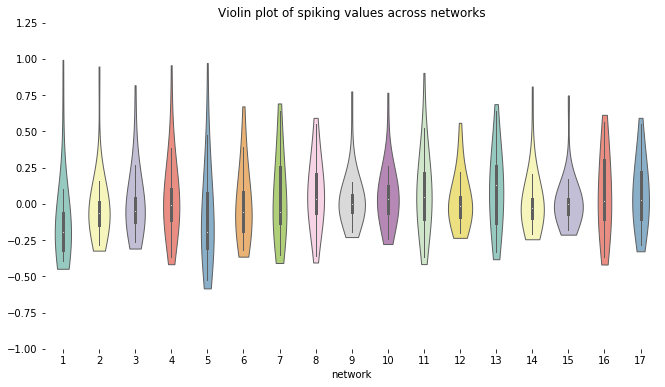

In [7]:
# visualizing exploratory data analysis

# pull out a specific subset of networks  
used_networks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
used_columns = (brain.columns.get_level_values("network")  
                          .astype(float)  
                          .isin(used_networks))  
brain = brain.loc[:, used_columns]  
  
# Compute the correlation matrix and average over networks  
corr_df = brain.corr().groupby(level="network").mean()  
corr_df.index = corr_df.index.astype(int)  
corr_df = corr_df.sort_index().T  
  
# Set up the matplotlib figure  
f, ax = plt.subplots(figsize=(11, 6))  
  
# Draw a violinplot with a narrower bandwidth than the default  
sns.violinplot(data=corr_df, palette="Set3", bw=1, cut=.2, linewidth=1)  
  
# Finalize the figure  
ax.set(ylim=(-1, 1.25))  
sns.despine(left=True, bottom=True)
plt.title("Violin plot of spiking values across networks");

This violing plot show that each network is fairly normally distributed. Networks 5, 11, 12, and 16 stuck out because their distributions are either very tall or very short.

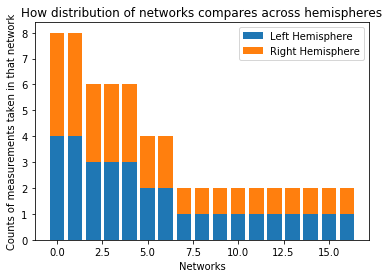

In [8]:
# visualizing exploratory analysis for categorical data

left = neuro[(neuro["hemi"] == "lh")]
right = neuro[(neuro["hemi"] == "rh")]
numL = left["network"].value_counts()
numR = right["network"].value_counts()
plt.bar(range(len(numL)),numL, label = "Left Hemisphere")
plt.bar(range(len(numR)),numR, bottom = numL, label = "Right Hemisphere")

plt.xlabel("Networks")
plt.ylabel("Counts of measurements taken in that network")
plt.title("How distribution of networks compares across hemispheres")
plt.legend()
plt.show();

It was interesting to find that there was an even distribution of recordings from networks from both the left and right hemispheres. This aligns well with the even counts of mesuremnts taken from both sides, but I thought they wouldn't match up perfectly like they did.

This is an addition analysis I found online that I found very interesting and helpful especially for neural processing data.

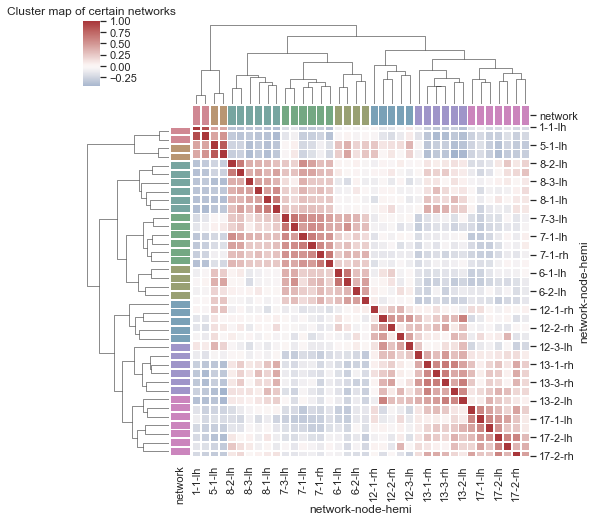

In [9]:
sns.set()  
  
# Load the brain networks example dataset  
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)  
  
# Select a subset of the networks  
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]  
used_columns = (df.columns.get_level_values("network")  
                          .astype(int)  
                          .isin(used_networks))  
df = df.loc[:, used_columns]  
  
# Create a categorical palette to identify the networks  
network_pal = sns.husl_palette(8, s=.45)  
network_lut = dict(zip(map(str, used_networks), network_pal))  
  
# Convert the palette to vectors that will be drawn on the side of the matrix  
networks = df.columns.get_level_values("network")  
network_colors = pd.Series(networks, index=df.columns).map(network_lut)  
  
# Draw the full plot  
sns.clustermap(df.corr(), center=0, cmap="vlag",  
               row_colors=network_colors, col_colors=network_colors,  
               linewidths=.75, figsize=(8, 8))
plt.title("Cluster map of certain networks");